INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/hamilton_dsa.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.
INFO: --- Starting Scintillation Pipeline for hamilton ---
INFO: Loading and processing raw data...
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/hamilton.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "hamilton",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/hamilton.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "padding_factor": 0.1,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 4,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": true
    },
    "fitting": {
      "fit_lagrange_mhz": 45.0,
      "reference_frequenc

INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1263.
INFO: Using symmetric noise window of duration 15 bins.
INFO: Using downsampled noise statistics from bins 77 to 78.
Iterative RFI Masking in Frequency Domain: 100%|██████████| 5/5 [00:00<00:00, 762.38it/s]
INFO: Masked 0 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying polynomial baseline subtraction...
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Applying 10.0% padding (0 downsampled bins) to each side.
INFO: Full signal envelope found between bins 1248 and 1263.
INFO: Performing order-1 polynomial baseline subtraction using off-pulse spectrum.
INFO: Baseline subtraction complete.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Lo

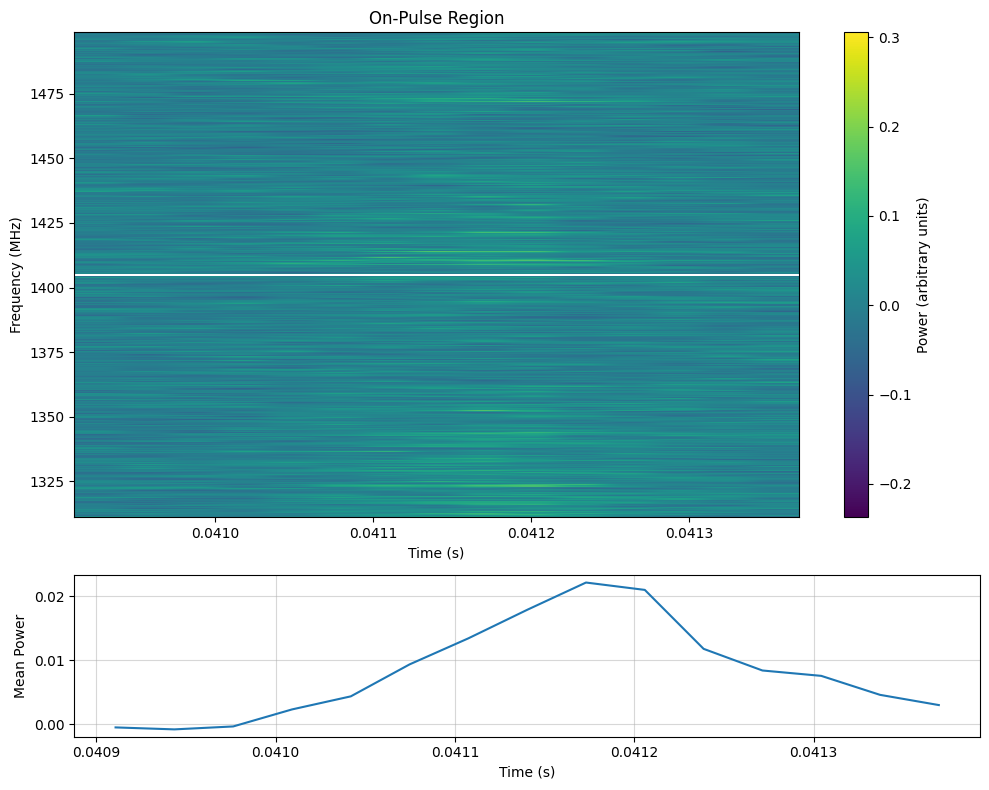

INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 1048)


<Figure size 640x480 with 0 Axes>

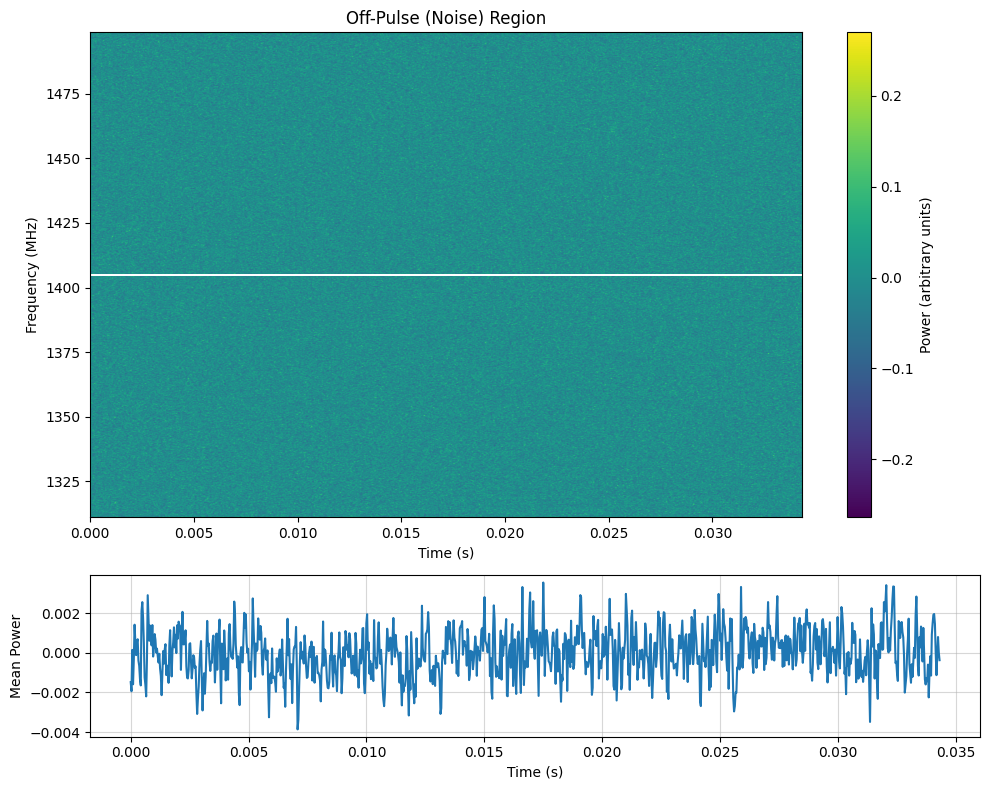

INFO: Diagnostic plots saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics
INFO: Characterizing off-pulse noise...
/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO: Noise characterization complete. Detected kind: 'flux_shiftedgamma'
INFO: Calculating ACFs for all sub-bands...
INFO: Starting sub-band ACF calculations.
INFO: Using robust noise parameters from provided NoiseDescriptor.
Calculating sub-band ACFs: 100%|██████████| 4/4 [00:00<00:00, 44.74it/s]
INFO: Fitting models and deriving final scintillation parameters...
INFO: Fitting all ACF mo

--- Pipeline Execution Finished ---

--- Generating Final Analysis Plot ---
Saved plots to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/hamilton_analysis_overview.png


INFO: Analysis overview plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/hamilton_analysis_overview.png


<Figure size 640x480 with 0 Axes>

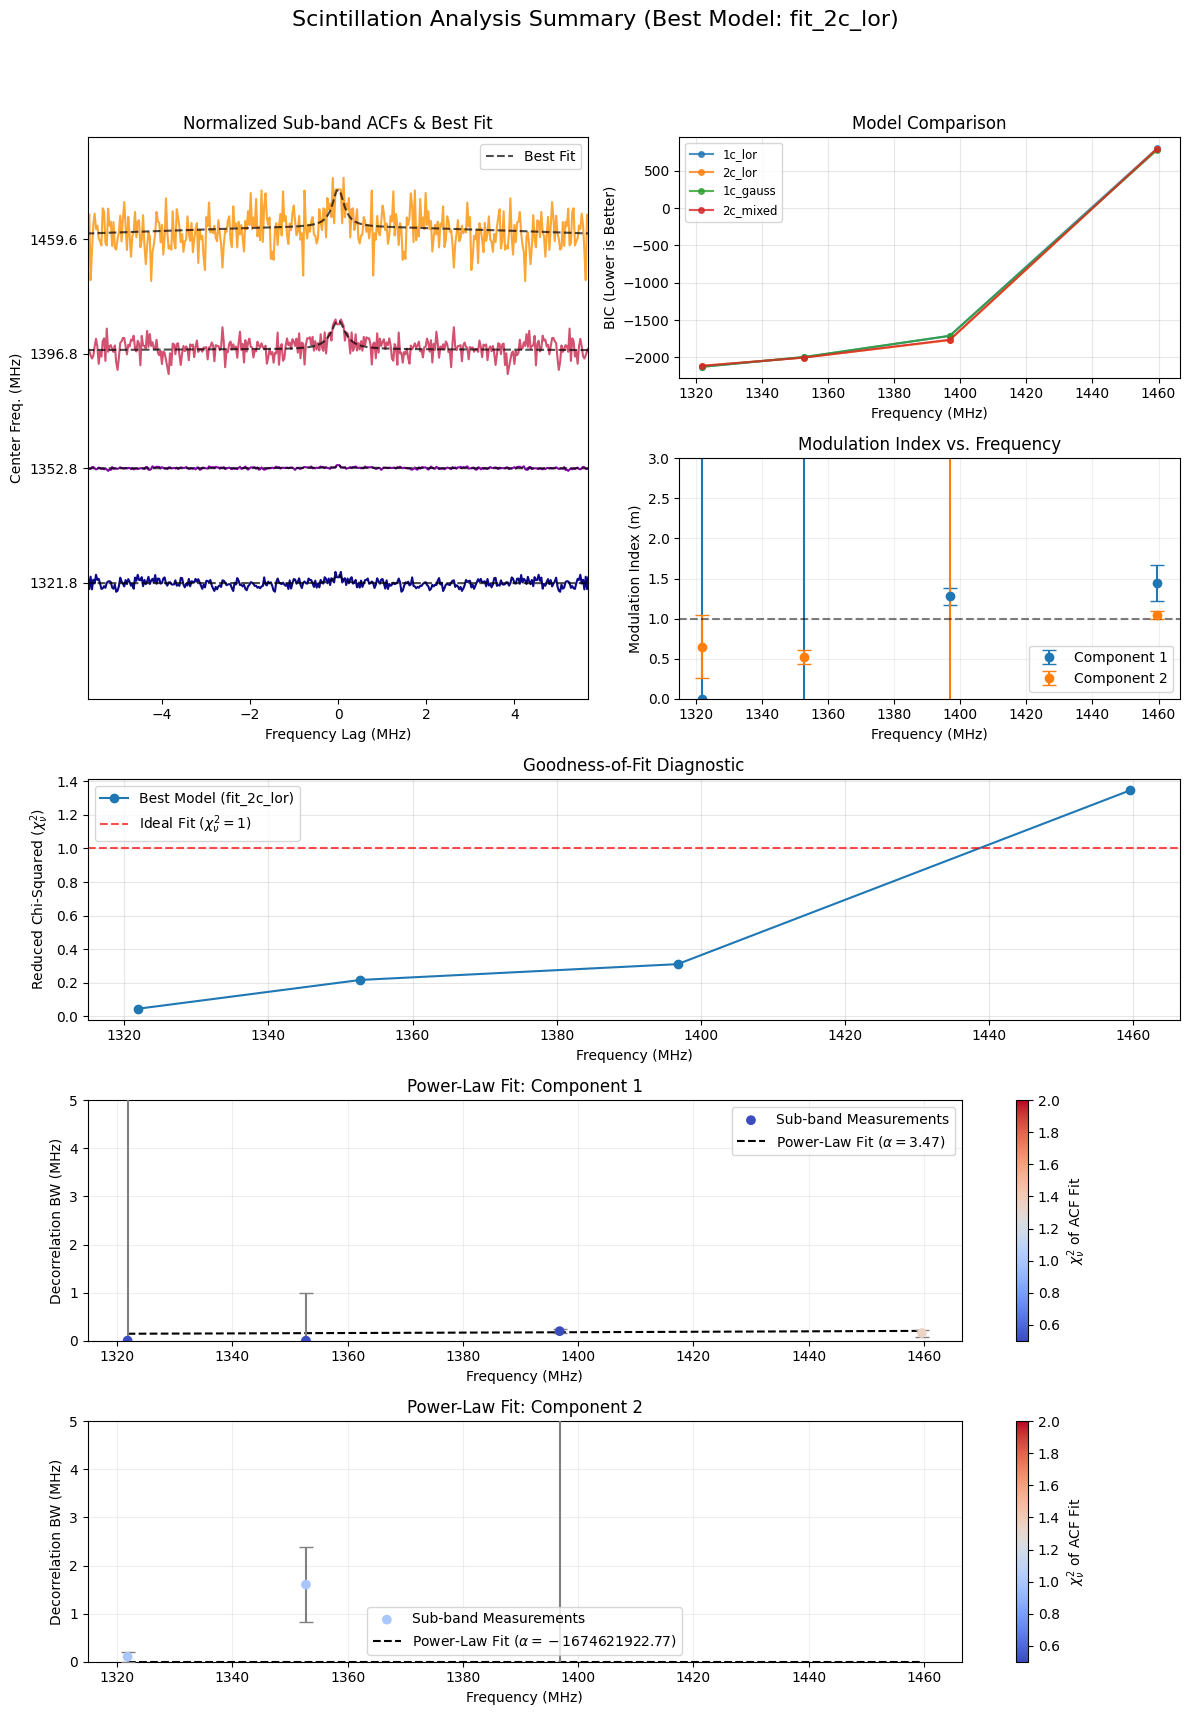

In [6]:
# Set path for module imports
import sys
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

import json
import logging
import numpy as np
import matplotlib.pyplot as plt

# Import the main pipeline components
from scint_analysis import config, pipeline, plotting
# Import your new noise model if you need to use it separately
# from scint_analysis import noise_model 

# --- 1. Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/hamilton_dsa.yaml'

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")
    # Stop execution if config fails
    raise

# --- 2. Initialize and Run the Pipeline ---
print("\n--- Initializing and Running Scintillation Pipeline ---")
# Create an instance of the main pipeline controller
scint_pipeline = pipeline.ScintillationAnalysis(analysis_config)

# This single .run() call executes all the steps in the correct order:
# - Loads and masks data
# - Characterizes off-pulse noise (NEW)
# - Calculates ACFs using the noise model for normalization
# - Fits all models and derives final parameters
scint_pipeline.run()
print("--- Pipeline Execution Finished ---")


# --- 3. Save and Plot Results ---

# Save the final parameters to a JSON file
if scint_pipeline.final_results:
    output_json_path = f"./{analysis_config.get('burst_id', 'output')}_analysis_results.json"
    # Note: You may need your NumpyJSONEncoder class if results contain numpy types
    with open(output_json_path, 'w') as f:
        json.dump(scint_pipeline.final_results, f, indent=4)
    logging.info(f"Final results saved to {output_json_path}")

# Generate the final overview plot using the results stored in the pipeline object
print("\n--- Generating Final Analysis Plot ---")
if scint_pipeline.final_results and scint_pipeline.all_subband_fits:
    # Get the plot save path from the config, as we implemented
    save_path = analysis_config.get('pipeline_options', {}).get('output_plot_path')
    print(f'Saved plots to: {save_path}')
    
    plotting.plot_analysis_overview(
        analysis_results=scint_pipeline.final_results,
        acf_results=scint_pipeline.acf_results,
        all_subband_fits=scint_pipeline.all_subband_fits,
        all_powerlaw_fits=scint_pipeline.all_powerlaw_fits,
        save_path=save_path
    )
else:
    logging.warning("Pipeline did not produce final results, skipping plot.")

In [14]:
# Standard library imports
import logging
import json
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/hamilton.yaml'


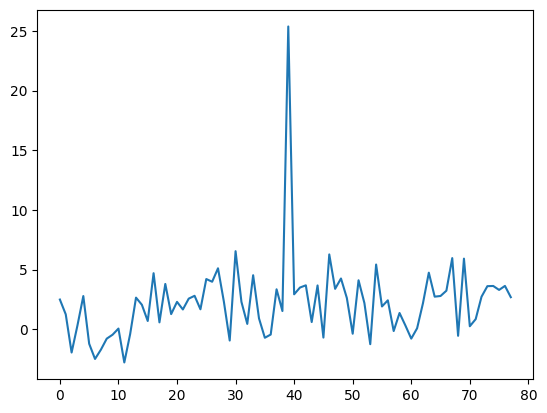

In [15]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

hamilton = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/hamilton_dsa_I_518_799_2500b_cntr_bpc.npy')
downsample_factor = 32
prof = np.nansum(hamilton,axis=0)
n = prof.size - (prof.size % downsample_factor)
prof = prof[:n].reshape(-1, downsample_factor).mean(axis=1)
    
plt.plot(prof)
#plt.xlim(1216, 1347)
plt.show()
                    

In [16]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    # Pretty-print the configuration to verify it
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")


INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/hamilton.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.


--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "hamilton",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/hamilton.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 4,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": true
    },
    "fitting": {
      "fit_lagrange_mhz": 45.0,
      "reference_frequency_mhz": 1400.0
    }
  },
  "pipeline_options": {
    "log_level": "INFO",
    "save_intermediat

INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/hamilton.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


Raw spectrum loaded successfully.
<DynamicSpectrum (6144 channels x 2500 timesteps, 1311.2-1498.8 MHz)>

Displaying raw dynamic spectrum...


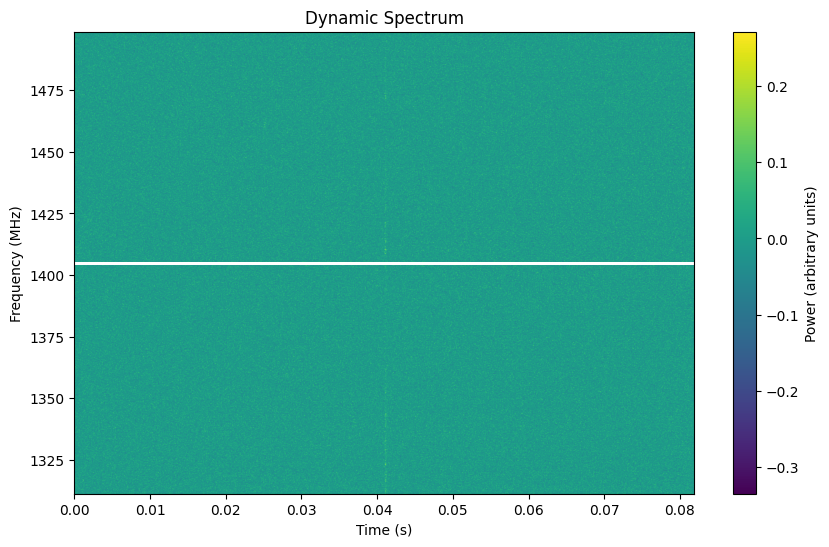

INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Applying RFI masking...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False F

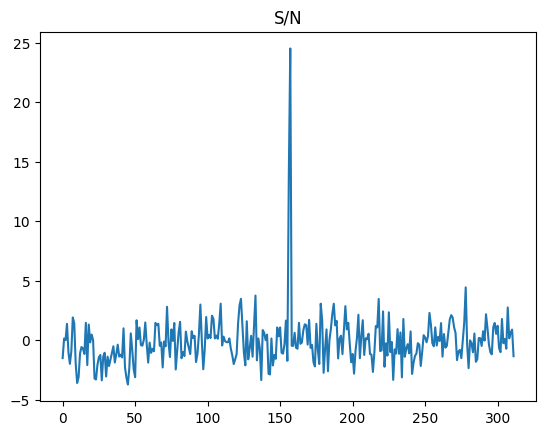

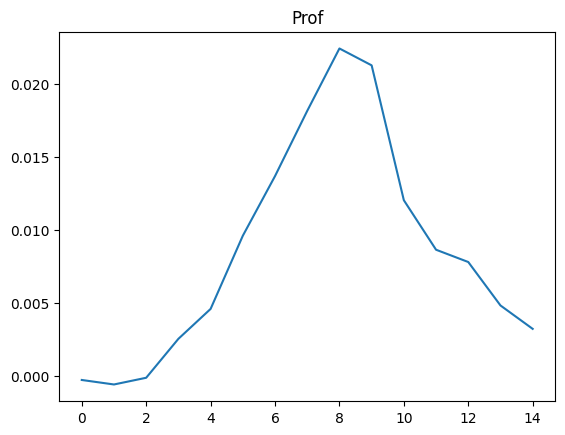

INFO: Burst envelope found between bins 1248 and 1263.
INFO: Using symmetric noise window of duration 15 bins.
INFO: Using downsampled noise statistics from bins 77 to 78.


Prof shape: (312,)
Peak S/N: 24.50960396612471


Iterative RFI Masking in Frequency Domain: 100%|██████████| 5/5 [00:00<00:00, 640.84it/s]
INFO: Masked 0 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


RFI masking complete.

Displaying RFI-masked dynamic spectrum...


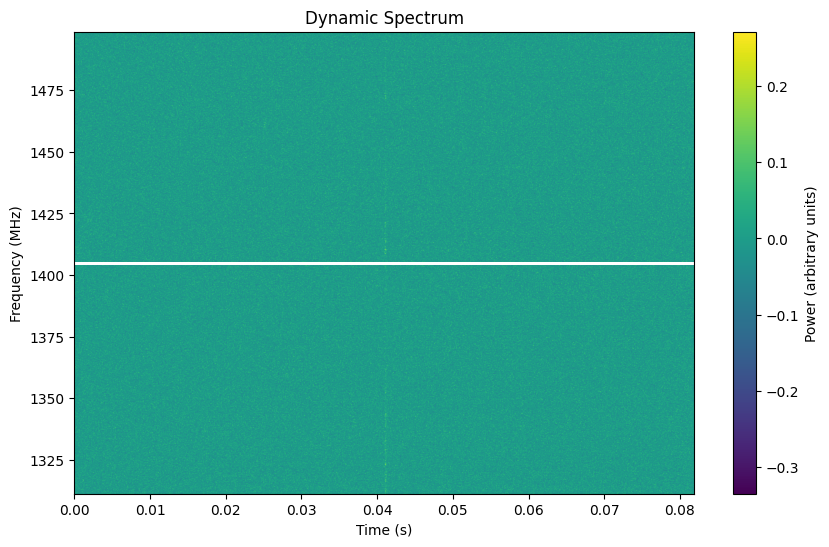

In [17]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# Load the dynamic spectrum from the path specified in the config
try:
    raw_spectrum = core.DynamicSpectrum.from_numpy_file(analysis_config['input_data_path'])
    print("Raw spectrum loaded successfully.")
    print(raw_spectrum)
except Exception as e:
    logging.error(f"Failed to load data: {e}")

# --- Visualization Step 1: Inspect Raw Data ---
if 'raw_spectrum' in locals():
    print("\nDisplaying raw dynamic spectrum...")
    plotting.plot_dynamic_spectrum(raw_spectrum)

# --- Perform RFI Masking ---
if 'raw_spectrum' in locals():
    print("\nApplying RFI masking...")
    masked_spectrum = raw_spectrum.mask_rfi(analysis_config)
    print("RFI masking complete.")

    # --- Visualization Step 2: Inspect Masked Data ---
    print("\nDisplaying RFI-masked dynamic spectrum...")
    plotting.plot_dynamic_spectrum(masked_spectrum)

INFO: Starting sub-band ACF calculations.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Calculating ACFs for all sub-bands (this may take a moment)...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

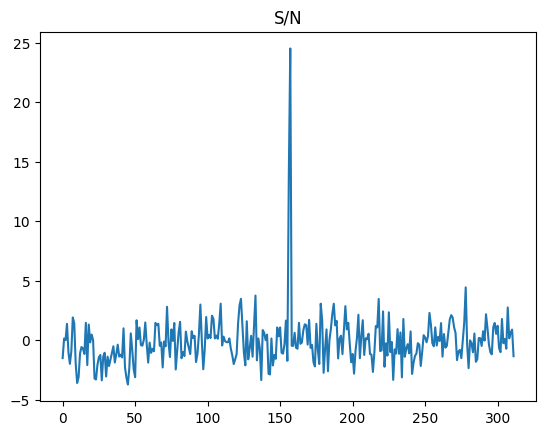

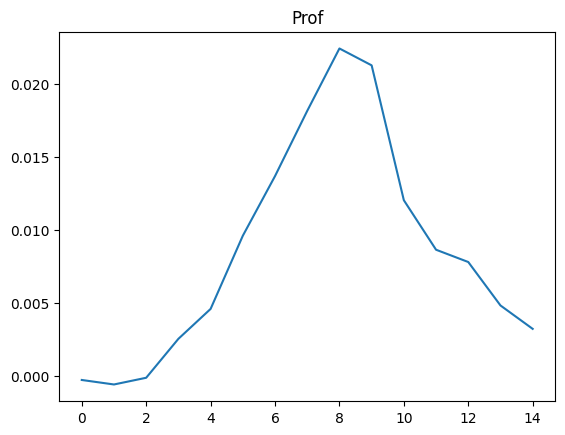

INFO: Burst envelope found between bins 1248 and 1263.


Prof shape: (312,)
Peak S/N: 24.50960396612471


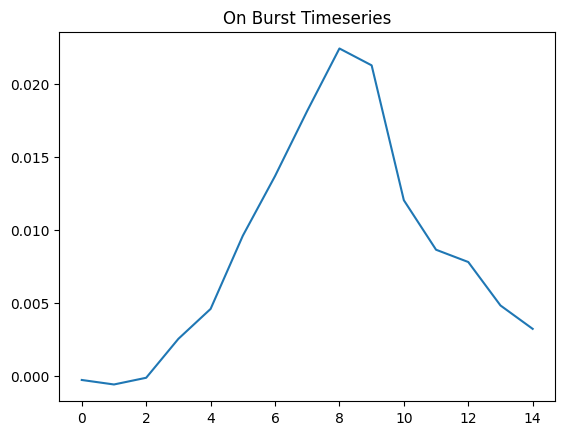

INFO: Using symmetric noise window of duration 15 bins.


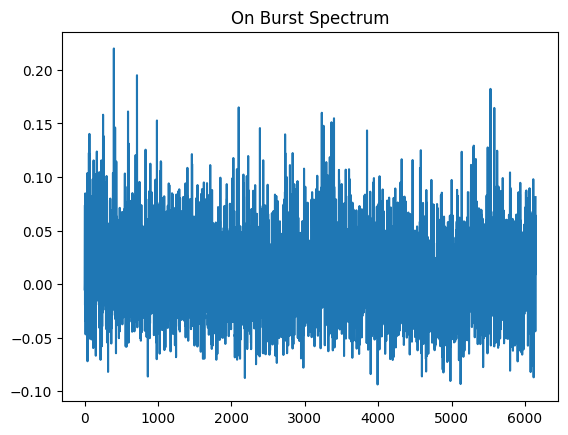

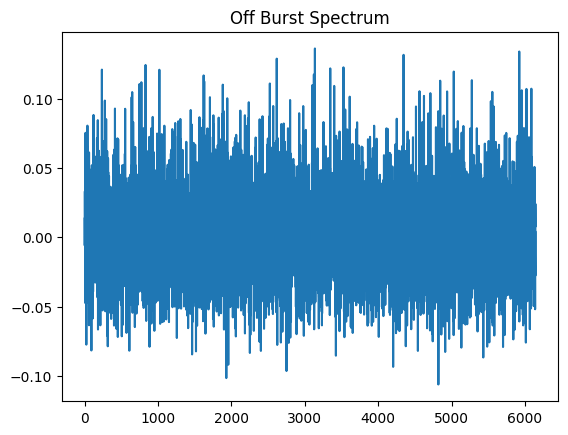

Calculating sub-band ACFs: 100%|██████████| 4/4 [00:00<00:00, 45.26it/s]

ACF calculation complete.

ACF Results Dictionary Keys: dict_keys(['subband_acfs', 'subband_lags_mhz', 'subband_center_freqs_mhz', 'subband_channel_widths_mhz', 'subband_num_channels'])
Computed ACFs for 4 sub-bands.


In [18]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Calculate ACFs for all sub-bands ---
if 'masked_spectrum' in locals():
    print("\nCalculating ACFs for all sub-bands (this may take a moment)...")
    acf_results = analysis.calculate_acfs_for_subbands(masked_spectrum, analysis_config)
    print("ACF calculation complete.")
    
    # You can inspect the structure of the results
    print("\nACF Results Dictionary Keys:", acf_results.keys())
    print(f"Computed ACFs for {len(acf_results['subband_acfs'])} sub-bands.")


In [19]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Run the final analysis and fitting stage ---
if 'acf_results' in locals() and acf_results['subband_acfs']:
    print("\nFitting models and deriving final scintillation parameters...")
    # This function returns both the final parameters and the raw lmfit objects
    final_results, all_subband_fits, powlaw_fit_params = analysis.analyze_scintillation_from_acfs(acf_results, analysis_config)
    print("Analysis complete.")

    # --- Inspect the Final Results ---
    print("\n--- Final Derived Parameters ---")
    print(json.dumps(final_results, indent=2))
else:
    logging.error("ACF results not available. Cannot proceed to final analysis.")


INFO: Fitting Lorentzian models to all sub-band ACFs...



Fitting models and deriving final scintillation parameters...


INFO: Model selection complete. Best overall model: 2 component(s).


α = 3.54,  A = 7.19e-13,  residual variance = 0.013
Analysis complete.

--- Final Derived Parameters ---
{
  "best_model": 2,
  "components": {
    "component_1": {
      "power_law_fit_report": [
        7.18553762047928e-13,
        3.5417133794662647
      ],
      "scaling_index": 3.5417133794662647,
      "scaling_index_err": 15.670618360802179,
      "bw_at_ref_mhz": 0.09980286877038785,
      "bw_at_ref_mhz_err": 0.059437158293649886,
      "subband_measurements": [
        {
          "freq_mhz": 1321.887107276575,
          "bw": 1.4524872392618349e-06,
          "mod": 4.679942934352324,
          "bw_err": 6187.246470232671,
          "finite_err": 1.8962709987416145e-10
        },
        {
          "freq_mhz": 1352.9285365456617,
          "bw": 0.0007814688369275347,
          "mod": 41.21181914081448,
          "bw_err": 0.8526632479433593,
          "finite_err": 1.7105032080318308e-06
        },
        {
          "freq_mhz": 1396.942047859352,
          "bw": 0.2009

INFO: Generating full analysis overview plot.



Generating final analysis overview plot...


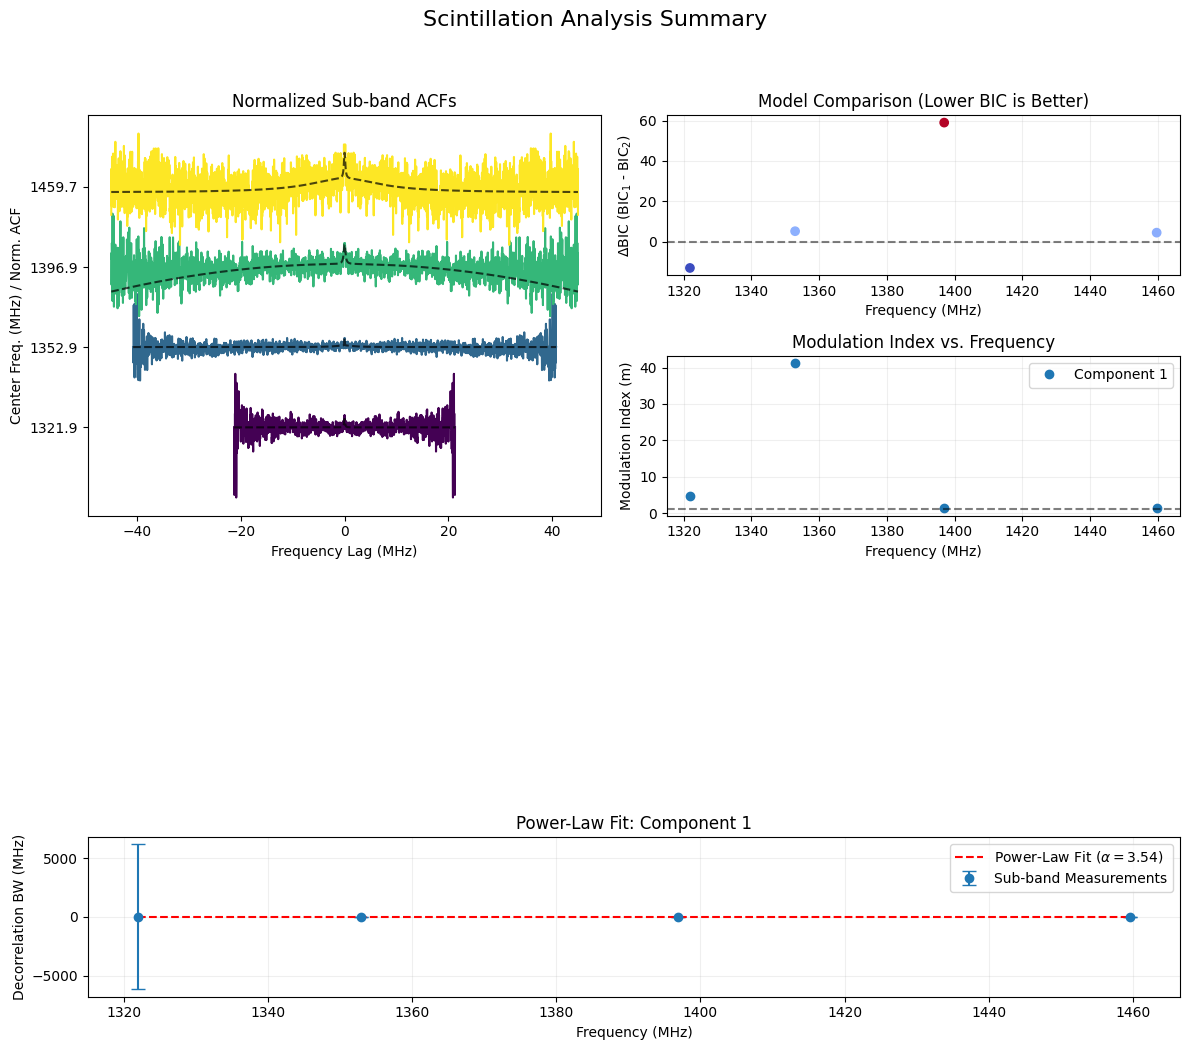

In [20]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# --- Generate the final overview plot ---
if 'final_results' in locals() and 'all_subband_fits' in locals():
    print("\nGenerating final analysis overview plot...")
    plotting.plot_analysis_overview(
        analysis_results=final_results,
        acf_results=acf_results,
        all_subband_fits=all_subband_fits,
        powlaw_fit_params=powlaw_fit_params
    )
else:
    logging.warning("Final results not available, skipping overview plot.")
